# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [15]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [16]:
# read the data
df = pd.read_csv(r"C:\Users\jessi\OneDrive\DataAnalytics\Python\FoodHub\data\foodhub_order.csv")
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:
The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [17]:
# get the shape of the dataframe
print('There are', df.shape[0], 'rows and', df.shape[1], 'columns.')

There are 1898 rows and 9 columns.


#### Observations:

The DataFrame has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [18]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

* There are 5 numerical columns and 4 object columns in the data.
* The rating column is expected to contain integer values, but some entries are labeled 'Not given', 
  indicating missing or non-numeric data. These will need to be handled appropriately before further analysis.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [19]:
# check for missing values using isnull() and sum()
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

* Nine columns in the dataset contain no missing values.
* Although the `rating` column does not contain nulls (`NaN`), some entries are labeled `'Not given'`, which should be treated as missing data.
* These values will be addressed after exploring feature distributions and relationships within the dataset, enabling more informed and effective imputation.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [20]:
# Get describe summary
summary = df.describe(include='all').T

# Add mode column
summary['mode'] = df.mode().iloc[0]

summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,mode
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0,1476547
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0,52832.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shake Shack
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41,12.18
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekend
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not given
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0,21.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0,24.0


In [ ]:
# Min, Max, and Average for food preparation time
min_prep_time = df['food_preparation_time'].min()
max_prep_time = df['food_preparation_time'].max()
avg_prep_time = df['food_preparation_time'].mean()

print('For food preparation time:')
print(f"Min: {min_prep_time}")
print(f"Max: {max_prep_time}")
print(f"Average: {avg_prep_time}")

For food preparation time:
Min: 20
Max: 35
Average: 27.371970495258168


#### Observations:

* `food_preparation_time`: The preparation time for an order ranges from a minimum of 20 minutes to a maximum of 35 minutes, with an average preparation time of 27.37 minutes.

##### Additional Observations:

* `restaurant_name`: Shake Shack is the most frequently ordered restaurant.
* `cuisine_type`: American cuisine is the most commonly selected type.
* `cost_of_the_order`: The average order cost is \\$14.14, ranging from \\$4.47 to \\$22.30.
* `day_of_the_week`: Orders peak during the weekend, indicating higher dining activity.
* `rating`: Most orders are unrated, suggesting limited customer feedback. Of the rating given, they ranged from 3 to 5, with an median of 5.
* `delivery_time`: Delivery times range from 15 to 33 minutes, with an average of 24 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [24]:
# replace 'Not given' with NaN and convert to numeric
df['rating'] = df['rating'].replace('Not given', np.nan)
df['rating'] = df['rating'].astype(float)
df['rating'] = df['rating'].astype('Int64')

# check the data type of the 'rating' column
print(df['rating'].dtype)

# Summary of missing values
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})


Int64


,Count,Percentage
rating,736,38.777661


#### Observations:

* Of the `1,898` orders placed, `736` were not rated, representing approximately `39%` of the dataset.

##### Additional Observations:

* There were 736 entries in the `rating` column labeled as `'Not given'`.
* The `rating` column was originally of type `object`, so to convert it to `int`, I first replaced `'Not given'` with `NaN` and converted the column to `float`.

In [25]:
# Get describe summary
summary = df.describe(include='all').T

# Add mode column
summary['mode'] = df.mode().iloc[0]

summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,mode
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0,1476547
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0,52832.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shake Shack
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41,12.18
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekend
rating,1162.0,<NA>,<NA>,<NA>,4.344234,0.741478,3.0,4.0,5.0,5.0,5.0,5
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0,21.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0,24.0


## Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

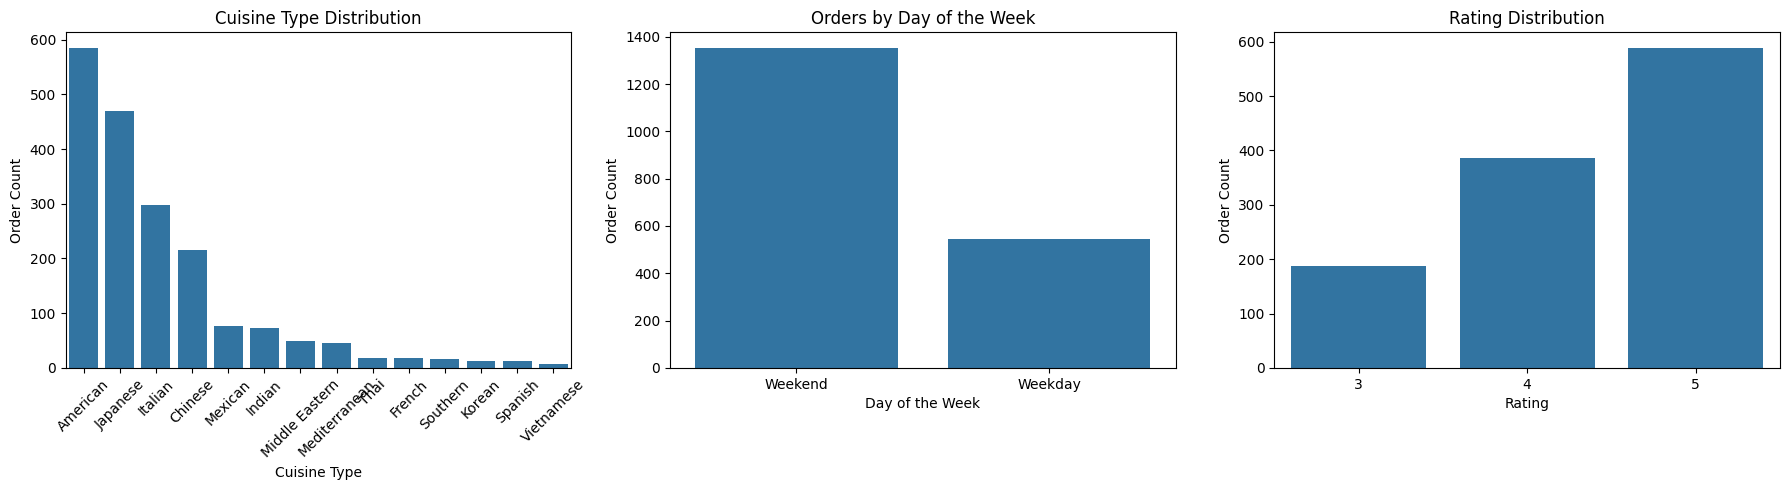

In [ ]:
# Create a 1X3 subplot layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) 

# Cuisine Type
sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index, ax=axes[0])
axes[0].set_title('Cuisine Type Distribution')
axes[0].set_ylabel('Order Count')
axes[0].set_xlabel('Cuisine Type')
axes[0].tick_params(axis='x', rotation=45)

# Day of the Week
sns.countplot(data=df, x='day_of_the_week', ax=axes[1])
axes[1].set_title('Orders by Day of the Week')
axes[1].set_ylabel('Order Count')
axes[1].set_xlabel('Day of the Week')

# Ratings
sns.countplot(data=df, x='rating', ax=axes[2])
axes[2].set_title('Rating Distribution')
axes[2].set_ylabel('Order Count')
axes[2].set_xlabel('Rating')

# Tight layout for spacing
plt.tight_layout()
plt.show()


#### Observations:

* As shown in the Cuisine Type countplot, American cuisine leads in popularity, followed by Japanese and Italian.
* As shown in the Day of the Week countplot, dining activity peaks on the weekend.
* Out of 1,898 total orders, 736 were not rated, indicating a substantial portion of missing feedback.
* Among the rated orders, none received a rating below 3, suggesting generally positive customer experiences.
* Rating 5 was the most frequent, highlighting a strong trend toward high satisfaction.

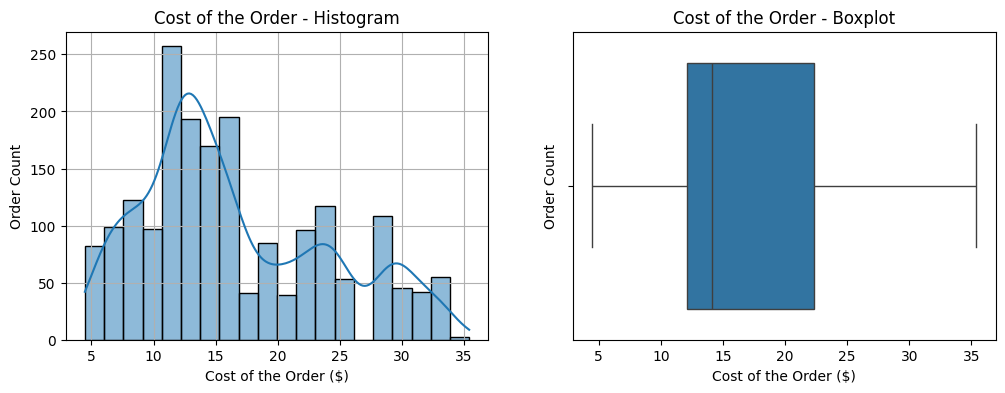

In [ ]:
# Cost of the Order

# Creates two side by side plots (one by two)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Histogram for Cost of the Order with KDE (left plot)
sns.histplot(df['cost_of_the_order'], bins=20, ax=ax[0], kde=True)
ax[0].set_title('Cost of the Order - Histogram')
ax[0].set_xlabel('Cost of the Order ($)')
ax[0].set_ylabel('Order Count')
ax[0].grid(True)

# Boxplot for Cost of the Order (right plot)
sns.boxplot(x=df['cost_of_the_order'], ax=ax[1])
ax[1].set_title('Cost of the Order - Boxplot')
ax[1].set_xlabel('Cost of the Order ($)')
ax[1].set_ylabel('Order Count')
plt.title('Cost of the Order - Boxplot')

plt.show()

#### Observations:

* Both the histogram and boxplot indicate a right-skewed distribution in the cost of orders, suggesting that most orders are relatively low-cost.
* The histogram shows a primary peak around \\$13, where the highest concentration of order costs occurs, along with secondary peaks near \\$24 and \\$29.
* The boxplot reveals a median cost near \\$14, confirming that half of the orders fall below this value.
* The mean cost of \\$16.50 exceeds the median, reinforcing the presence of a right-skewed distribution where higher-cost orders pull the average upward.

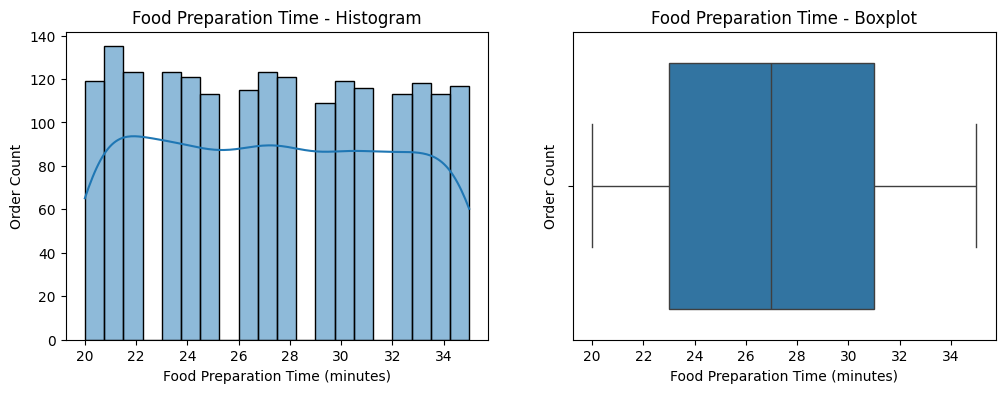

In [30]:
# Food Preparation Time

# Creates two side by side plots (one by two)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Histogram for Food Preparation Time with KDE (left plot)
sns.histplot(df['food_preparation_time'], bins=20, ax=ax[0], kde=True)
ax[0].set_title('Food Preparation Time - Histogram')
ax[0].set_xlabel('Food Preparation Time (minutes)')
ax[0].set_ylabel('Order Count')

# Boxplot for Food Preparation Time (right plot)
sns.boxplot(x=df['food_preparation_time'], ax=ax[1])
ax[1].set_title('Food Preparation Time - Boxplot')
ax[1].set_xlabel('Food Preparation Time (minutes)')
ax[1].set_ylabel('Order Count')

plt.show()

#### Observations:

* Both the histogram and boxplot suggest a fairly uniform distribution of food preparation times, with no strong skew or clustering. 
* The mean and median are both approximately 27 minutes, indicating a balanced central tendency.

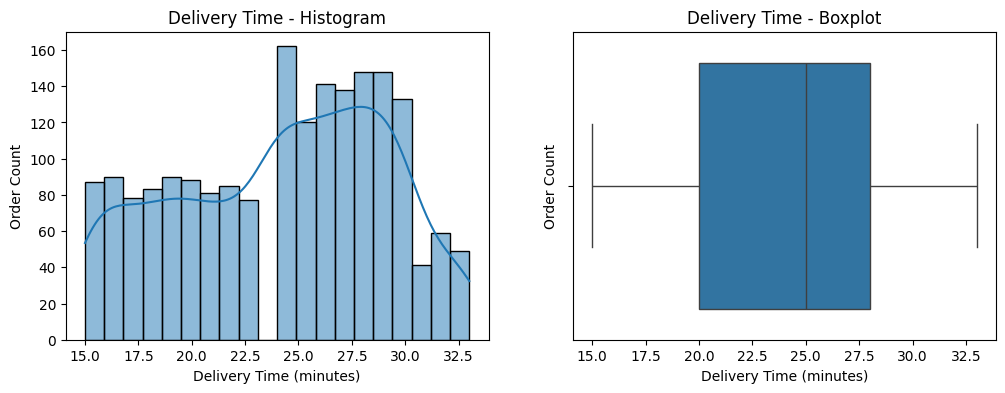

In [31]:
# Delivery Time

# Creates two side by side plots (one by two)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Histogram for Delivery Time with KDE (left plot)
sns.histplot(df['delivery_time'], bins=20, ax=ax[0], kde=True)
ax[0].set_title('Delivery Time - Histogram')
ax[0].set_xlabel('Delivery Time (minutes)')
ax[0].set_ylabel('Order Count')

# Boxplot for Delivery Time (right plot)
sns.boxplot(x=df['delivery_time'], ax=ax[1])
ax[1].set_title('Delivery Time - Boxplot')
ax[1].set_xlabel('Delivery Time (minutes)')
ax[1].set_ylabel('Order Count')
plt.show()

#### Observations:

* The histogram displays a multimodal distribution, with a relatively flat region on the left (suggesting a near-uniform spread of shorter delivery times) followed by a distinct peak around 28 minutes, where delivery times are most concentrated.
* The boxplot reveals a median time near 25 minutes, confirming that half of the delivery times fall below this value.
* The mean delivery time is 24 minutes, which is slightly less than the median—this may suggest a mild left skew, but the histogram indicate a more balanced or slightly right-skewed distribution overall (with a longer tail on the right).

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

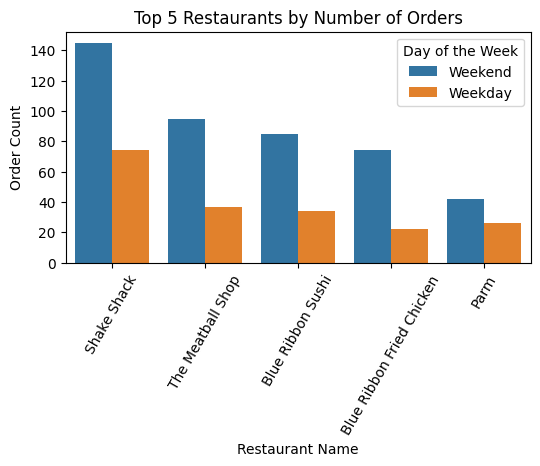

In [30]:
# Get a list of top 5 restaurant names by highest number of orders and extracts their names
top_5 = df['restaurant_name'].value_counts().head(5).index

# Plot of top_5 restaurant names ordered by highest to lowest number of orders
plt.figure(figsize=(6, 3))
sns.countplot(data=df[df['restaurant_name'].isin(top_5)], x='restaurant_name', order=top_5, hue='day_of_the_week')
plt.title('Top 5 Restaurants by Number of Orders')
plt.xlabel('Restaurant Name')
plt.ylabel('Order Count')
plt.xticks(rotation=60)
plt.legend(title='Day of the Week')
plt.show()


In [ ]:
# Calculate the number of orders for Shake Shack and The Meatball Shops then find the difference
shake_shack_count = df['restaurant_name'].value_counts().get('Shake Shack', 0)
meatball_shop_count = df['restaurant_name'].value_counts().get('The Meatball Shop', 0)
difference = shake_shack_count - meatball_shop_count

print(f'Shake Shack received {shake_shack_count} orders.')
print(f'The Meatball Shop received {meatball_shop_count} orders.')
print(f'Difference in orders: {difference}')

Shake Shack received 219 orders.
The Meatball Shop received 132 orders.
Difference in orders: 87


#### Observations:

* Shake Shack is the first-place restaurant and received approximately 219 orders, outperforming the second-place restaurant (The Meatball Shop) by 87 orders.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

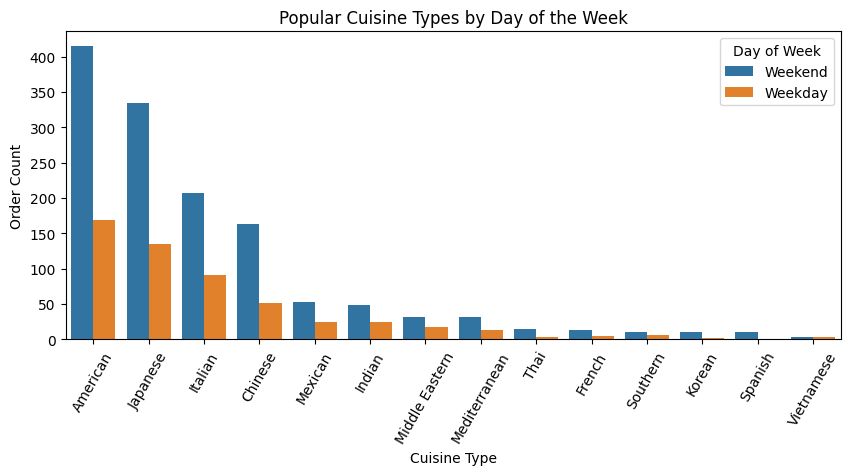

In [31]:
# Sort cuisine types by overall popularity
order = df['cuisine_type'].value_counts().index

# Plot of Cuisine Types with Day of the Week as hue, ordered by overall popularity
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week', order=order)
plt.title('Popular Cuisine Types by Day of the Week')
plt.xlabel('Cuisine Type')
plt.ylabel('Order Count')
plt.xticks(rotation=60)
plt.legend(title='Day of Week')
plt.show()

In [36]:
# Calculate the number of orders for American cuisine on weekends and find the difference with Japanese cuisine
weekend_american_count = df[
    df['day_of_the_week'].isin(['Weekend']) & 
    (df['cuisine_type'] == 'American')
].shape[0]

weekend_japanese_count = df[
    df['day_of_the_week'].isin(['Weekend']) & 
    (df['cuisine_type'] == 'Japanese')
].shape[0]

print('Number of American cuisine orders on weekends:', weekend_american_count)
print('Difference from Japanese cuisine:', weekend_american_count - weekend_japanese_count)

Number of American cuisine orders on weekends: 415
Difference from Japanese cuisine: 80


#### Observations:

* Among the top three cuisine types—American, Japanese, and Italian—American cuisine is the most ordered on the weekend and overall.
* American cuisine leads with approximately 415 weekend orders, exceeding Japanese cuisine by about 80 weekend orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

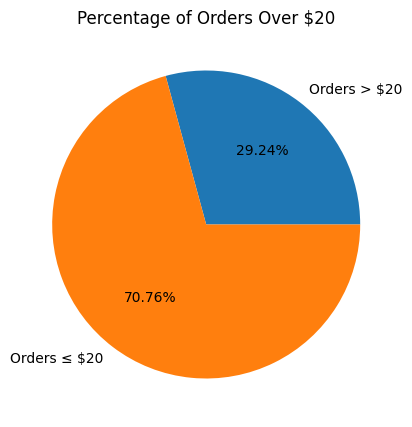

In [ ]:
# Calculate the percentage of orders that cost more than $20

# This creates a boolean Series of True/False that .mean() converts to 0s and 1s, then multiplies by 100 to get percentage
percentage_above_20 = (df['cost_of_the_order'] > 20).mean() * 100

# Pie chart of orders above and below $20
plt.figure(figsize=(5, 5))
plt.pie(
    [percentage_above_20, 100 - percentage_above_20],   # Blue slice = orders > $20, Orange slice = orders ≤ $20
    labels=['Orders > $20', 'Orders ≤ $20'],            # Labels for the slices
    autopct='%1.2f%%')                                  # Display percentage on each slice with two decimal places
plt.title('Percentage of Orders Over $20')
plt.show()



#### Observations:

* Approximately `29%` of orders cost more than \\$20, while the majority — 71% — were priced at \\$20 or less.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [27]:
# Mean order delivery time with two decimal places
mean_delivery_time = round(df['delivery_time'].mean(), 2)
mean_delivery_time

np.float64(24.16)

#### Observations:

* The average delivery time is approximately 24 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [28]:
# Get a list of top 5 customers by highest number of orders and extracts their ids
top_5 = df['customer_id'].value_counts().head(5).reset_index()
top_5.columns = ['customer_id', 'order_count']
top_5

,customer_id,order_count
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,259341,7


#### Observations:

* The top five customers by number of orders are: customer `52832` with 13 orders, customer `47440` with 10 orders, customer `83287` with 9 orders, customer `250494` with 8 orders, and customer `259341` with 7 orders
* The top five customers placed between 7 and 13 orders each, with customer `52832` leading at 13 total orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


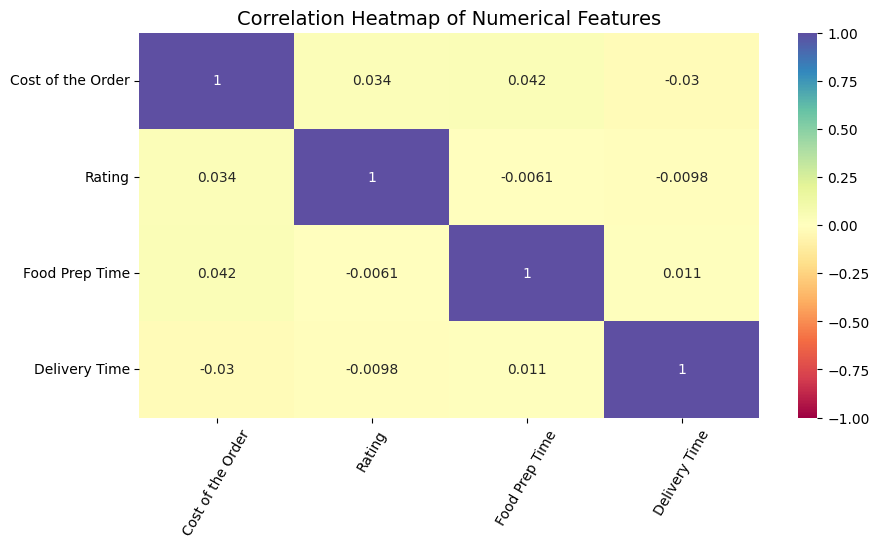

In [ ]:
# Heatmap of correlations between numerical features

# Create a copy of the DataFrame with renamed columns
df_renamed = df.rename(columns={
    'cost_of_the_order': 'Cost of the Order',
    'rating': 'Rating',
    'food_preparation_time': 'Food Prep Time',
    'delivery_time': 'Delivery Time'
})

# Select only relevant numerical features by dropping customer_id and order_id
heatmap_data = df_renamed.select_dtypes(include='number').drop(columns=['customer_id', 'order_id'])

# Generate the heatmap using the renamed DataFrame
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.xticks(rotation=60)
plt.yticks(rotation=0)
plt.show()


#### Observations:

* The heatmap of numerical features reveals no strong linear correlations among most variables.

#### Multivariate Analysis between numerical and categorical data
- Numerical: `cost_of_the_order`, `food_preparation_time`, `delivery_time`, `rating` (after cleaning)
- Categorical: `cuisine_type`, `day_of_the_week`, `restaurant_name`

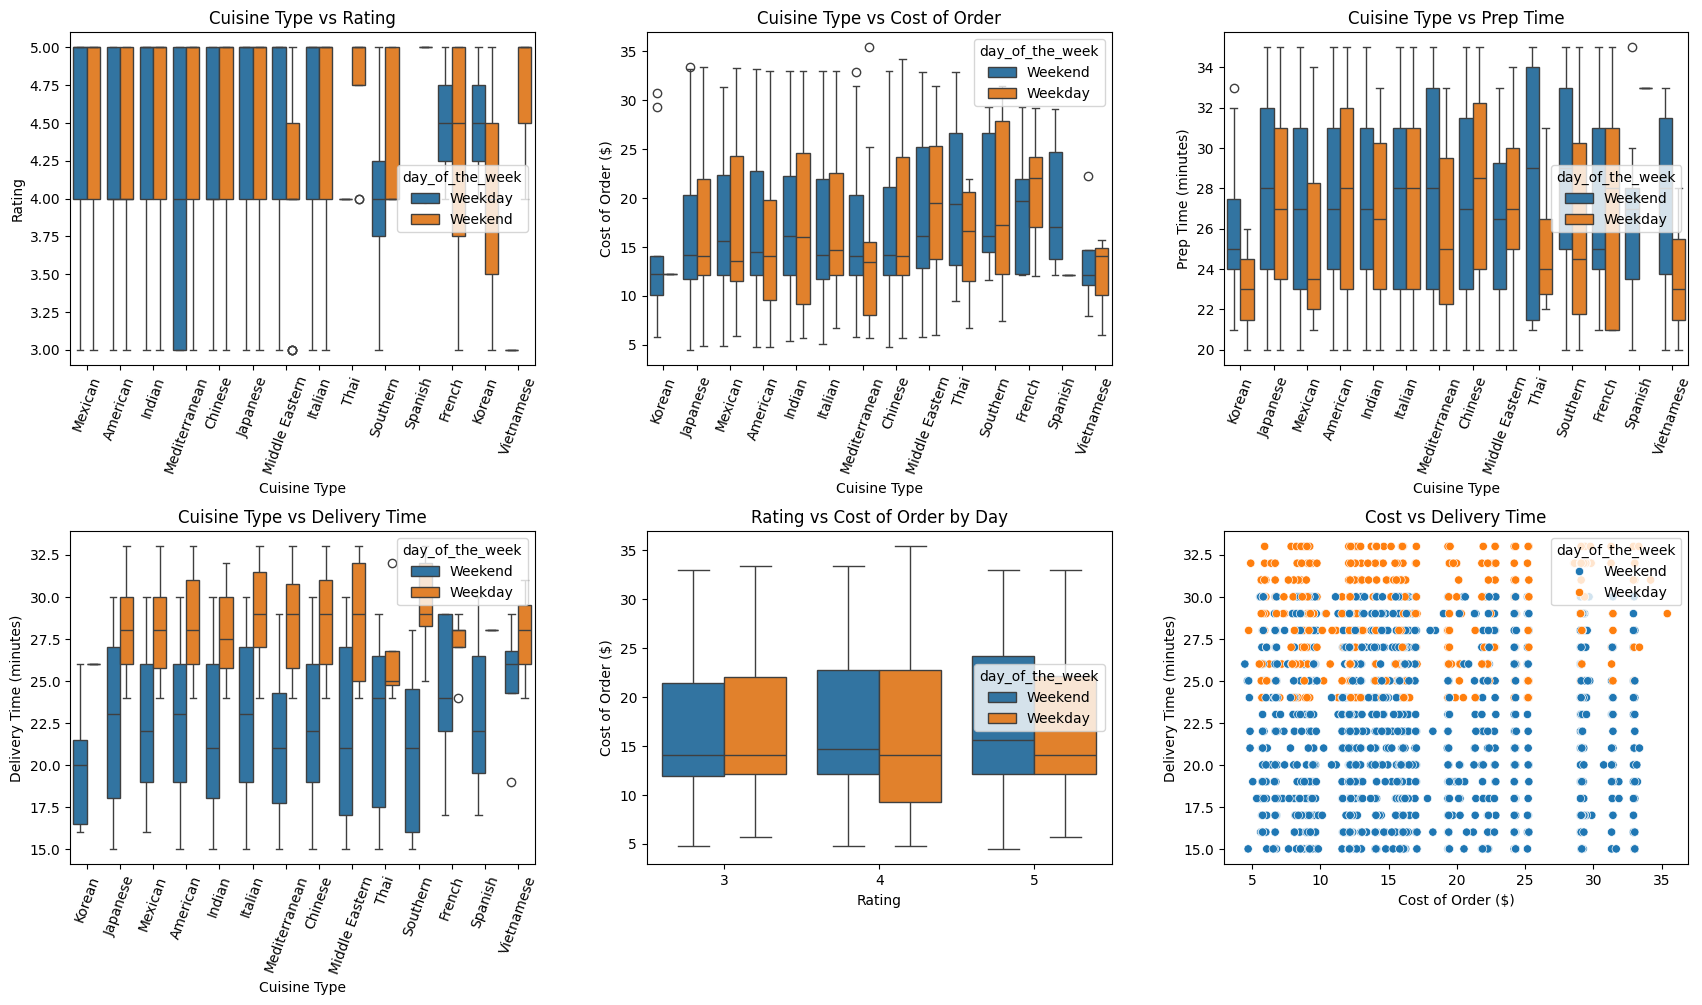

In [ ]:
# Create 2x3 subplot grid
fig, ax = plt.subplots(2, 3, figsize=(18, 10))
fig.tight_layout(pad=5.0)
fig.subplots_adjust(hspace=0.5)

# 1. Cuisine Type vs Rating
filtered_df = df[df['rating'] != 'Not given']
sns.boxplot(data=filtered_df, x='cuisine_type', y='rating', ax=ax[0, 0], hue='day_of_the_week')
ax[0, 0].set_title('Cuisine Type vs Rating')
ax[0, 0].set_xlabel('Cuisine Type')
ax[0, 0].set_ylabel('Rating')
ax[0, 0].tick_params(axis='x', rotation=70)

# 2. Cuisine Type vs Cost
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', ax=ax[0, 1], hue='day_of_the_week')
ax[0, 1].set_title('Cuisine Type vs Cost of Order')
ax[0, 1].set_xlabel('Cuisine Type')
ax[0, 1].set_ylabel('Cost of Order ($)')
ax[0, 1].tick_params(axis='x', rotation=70)

# 3. Cuisine Type vs Prep Time
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time', ax=ax[0, 2], hue='day_of_the_week')
ax[0, 2].set_title('Cuisine Type vs Prep Time')
ax[0, 2].set_xlabel('Cuisine Type')
ax[0, 2].set_ylabel('Prep Time (minutes)')
ax[0, 2].tick_params(axis='x', rotation=70)

# 4. Cuisine Type vs Delivery Time
sns.boxplot(data=df, x='cuisine_type', y='delivery_time', ax=ax[1, 0], hue='day_of_the_week')
ax[1, 0].set_title('Cuisine Type vs Delivery Time')
ax[1, 0].set_xlabel('Cuisine Type')
ax[1, 0].set_ylabel('Delivery Time (minutes)')
ax[1, 0].tick_params(axis='x', rotation=70)

# 5. Rating vs Cost
sns.boxplot(data=filtered_df, x='rating', y='cost_of_the_order', hue='day_of_the_week', ax=ax[1, 1])
ax[1, 1].set_title('Rating vs Cost of Order by Day')
ax[1, 1].set_xlabel('Rating')
ax[1, 1].set_ylabel('Cost of Order ($)')

# 6. Cost vs Delivery Time
sns.scatterplot(data=df, x='cost_of_the_order', y='delivery_time', ax=ax[1, 2], hue='day_of_the_week')
ax[1, 2].set_title('Cost vs Delivery Time')
ax[1, 2].set_xlabel('Cost of Order ($)')
ax[1, 2].set_ylabel('Delivery Time (minutes)')

# Show all plots
plt.show()

#### Observations:

* Cuisine Type vs Rating: On weekdays, Mediterranean and Southern cuisines received the lowest average ratings. On weekends, French and Korean cuisines showed the lowest ratings.
* Cuisine Type vs Cost: Most cuisines maintain similar cost distributions between weekdays and weekends. However, slight decreases are visible  during the weekday for Korean, Mediterranean, Thai and Spanish cuisines.
* Cuisine Type vs Prep Time: Most cuisines show similar preparation time distributions between weekdays and weekends. However, slight increases in prep time are visible on weekends for Korean, Mexican, Thai, Southern, and Vietnamese cuisines.
* Cuisine Type vs Delivery Time: Most cuisine types show longer delivery times on weekdays compared to weekends.
* Rating vs Cost: Ratings maintain similar cost distributions between weekdays and weekends.
* Cost vs Delivery Time: Orders placed on weekdays generally show longer delivery times across most cost ranges compared to weekends. This suggests that weekday deliveries may be slower, potentially due to traffic, staffing, or order volume.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Group by restaurant and calculate count and mean of ratings
rating_summary = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter for restaurants with >50 ratings and average rating >4
highly_rated = rating_summary[(rating_summary['count'] > 50) & (rating_summary['mean'] > 4)]
highly_rated


,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:

* `The Meatball Shop`, `Shake Shack`, `Bue Ribbon Fried Chicken`, and `Blue Ribbon Sushi` all qualify for the promotional offer in their advertisements.
* `The Meatball Shop` has the highest average rating of `4.51`, showing strong customer satisfaction.
* `Shake Shack` has the largest volume of ratings with a count of `133`, showing high customer engagement.



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Define a function to calculate charges per order
def calculate_charges(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

# Apply the function to each order and add them to a new column 'charges'
df['charges'] = df['cost_of_the_order'].apply(calculate_charges)

# Sum all charges to get net revenue
net_revenue = df['charges'].sum()
net_revenue

np.float64(6166.303)

#### Observations:

* The company's net revenue from service charges generated on restaurant orders is `$6,166.30`.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Count total number of orders
total_orders = df.shape[0]

# Identify orders exceeding 60 minutes (prep + delivery)
greater_than_60 = df[(df['delivery_time'] + df['food_preparation_time']) > 60].shape[0]

# Calculate percentage of delayed orders
late_percentage = (greater_than_60 / total_orders) * 100

print(f"Percentage of orders delivered in over 60 minutes: {late_percentage:.2f}%")

Percentage of orders delivered in over 60 minutes: 10.54%


#### Observations:

* Out of all orders, 11% exceeded the 60-minute delivery threshold when combining both preparation and transit time.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [12]:
# Group and calculate mean delivery time
mean_delivery_by_day = df.groupby('day_of_the_week')['delivery_time'].mean().reset_index()

# Rename columns for clarity
mean_delivery_by_day = mean_delivery_by_day.rename(columns={
    'day_of_the_week': 'Day of Week',
    'delivery_time': 'Mean Time'
})

print(mean_delivery_by_day)


  Day of Week  Mean Time
0     Weekday  28.340037
1     Weekend  22.470022


#### Observations:

* The mean delivery time on the weekday is 28 minutes, which exceeds the weekend average of 22 minutes.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

* Customer Satisfaction Is High: Among rated orders, no ratings fell below 3, and rating 5 was most frequent — indicating strong customer satisfaction. However, 39% of orders lacked ratings, revealing a significant gap in feedback collection.
* American Cuisine Leads in Popularity: American cuisine is the most ordered overall and especially on weekends, with Shake Shack leading in total orders and customer engagement. Japanese and Italian follow closely in popularity.
* Weekday Delivery Is Slower Across the Board: Weekday orders have a longer average delivery time (28 minutes) compared to weekends (22 minutes), and most cuisine types show increased delivery times on weekdays — likely due to traffic, staffing, or operational load.
* Order Costs Are Skewed Low, with Cuisine-Based Variations: Most orders are priced under \\$20, with a median cost of \\$14 and a mean of \\$16.50. Vietnamese cuisine is the most budget-friendly, while French cuisine consistently ranks highest in cost across both weekdays and weekends.
* Prep Times Are Stable but Slightly Longer on Weekends for Some Cuisines: Preparation time averages 27 minutes with a uniform distribution. However, Korean, Mexican, Thai, Southern, and Vietnamese cuisines show slight increases in prep time on weekends.
* Ratings Are Consistent Across Days, but Some Cuisines Lag: Ratings maintain similar cost distributions between weekdays and weekends. On weekdays, Mediterranean and Southern cuisines received the lowest average ratings; on weekends, French and Korean cuisines showed the lowest.
* Top Restaurants and Customers Drive Volume: Shake Shack and The Meatball Shop are high-performing restaurants. A small group of loyal customers placed between 7 and 13 orders each, with customer 52832 leading at 13.
* Operational Bottlenecks Exist: 11% of orders exceeded the 60-minute threshold when combining prep and delivery time, which may impact customer satisfaction and efficiency.



### Recommendations:

* Boost Feedback Collection
    - Encourage ratings through post-delivery prompts or incentives to reduce the 39% unrated gap.
    - Use feedback to identify service issues and reward high-performing restaurants.
* Optimize Weekday Operations
    - Investigate weekday delivery delays and consider staffing or routing adjustments to reduce the 28-minute average.
    - Use predictive scheduling to allocate resources more efficiently during peak weekday hours.
* Leverage Popular Cuisine Trends
    - Promote American cuisine offerings, especially on weekends and budget-friendly options like Vietnamese cuisine.
    - Highlight high-rated restaurants like The Meatball Shop.
    - Monitor lower-rated cuisines (e.g., Mediterranean, Southern, French, Korean) for quality improvement opportunities
* Pricing Strategies
    - Highlight affordable options like Vietnamese cuisine to appeal to customers who are watching their budget.
    - Treat higher-cost cuisines like French as special-occasion meals, and suggest extras (like desserts or drinks).
* Reward Loyal Customers
    - Create a loyalty program for repeat customers like those in the top five, offering exclusive discounts or early access to promotions.
    - Use customer order history to personalize offers and encourage continued engagement.
* Monitor and Reduce Long Fulfillment Times
    - Flag orders exceeding 60 minutes for review.
    - For restaurants with longer prep times, consider batching deliveries or adjusting delivery windows to improve efficiency.


---